# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

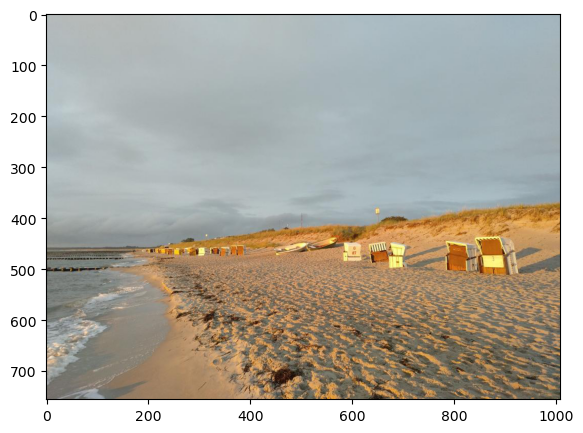

In [4]:
img = cv2.imread('data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x16d3cc4b500>)

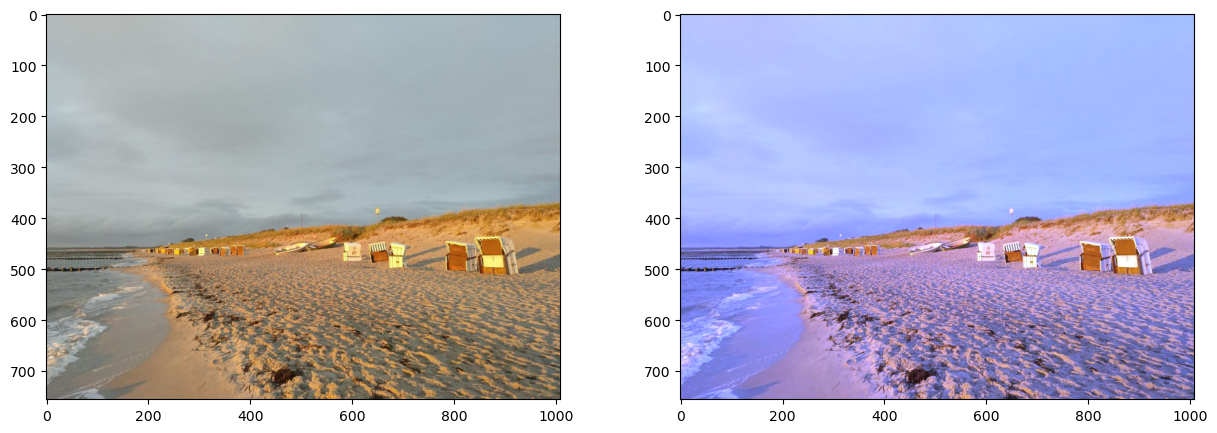

In [5]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

mean source: 162.25943903796087 156.8133752729487 144.08029809145881
coeffs: [0.8        0.82778367 0.90093894]
mean balanced: 0.5090493 0.50904924 0.50904924
type balanced: float32


(<Axes: >, <matplotlib.image.AxesImage at 0x16d0b4e7620>)

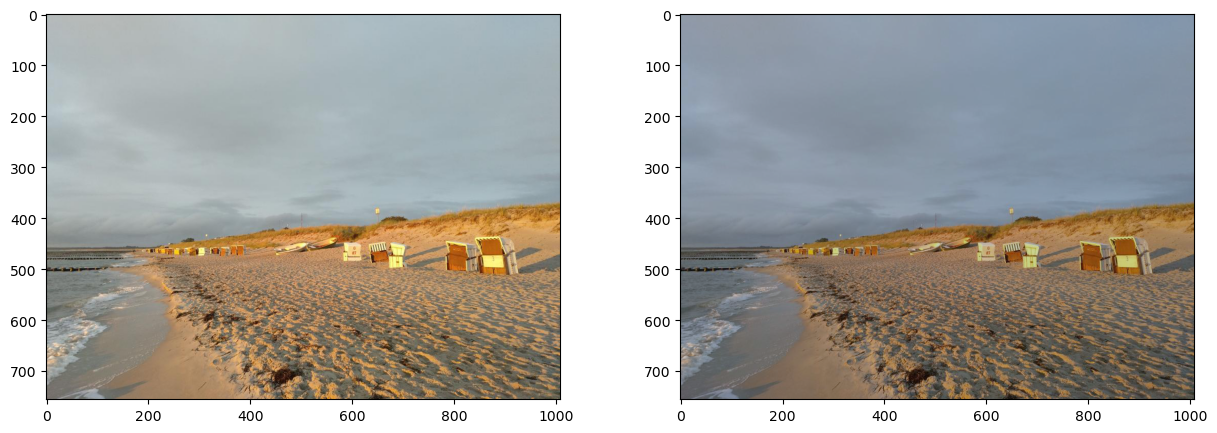

In [79]:
# Load your image
img = cv2.imread('sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[...,0])
mean_g = np.mean(img[...,1])
mean_b = np.mean(img[...,2])

print("mean source:", mean_r, mean_g, mean_b)
# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

# assume R channel to constant
kr = 0.8

kg = (mean_r*kr)/mean_g
kb = (mean_r*kr)/mean_b
 
coeffs = np.array([kr,kg,kb])
print("coeffs:", coeffs)

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)

for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

balanced = balanced/255
balanced[balanced > 1] = 1

print("mean balanced:", np.mean(balanced[...,0]), np.mean(balanced[...,1]), np.mean(balanced[...,1]))
print("type balanced:", balanced.dtype)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

coeffs: 255 255 237
type balanced: float32


(<Axes: >, <matplotlib.image.AxesImage at 0x16d6a933680>)

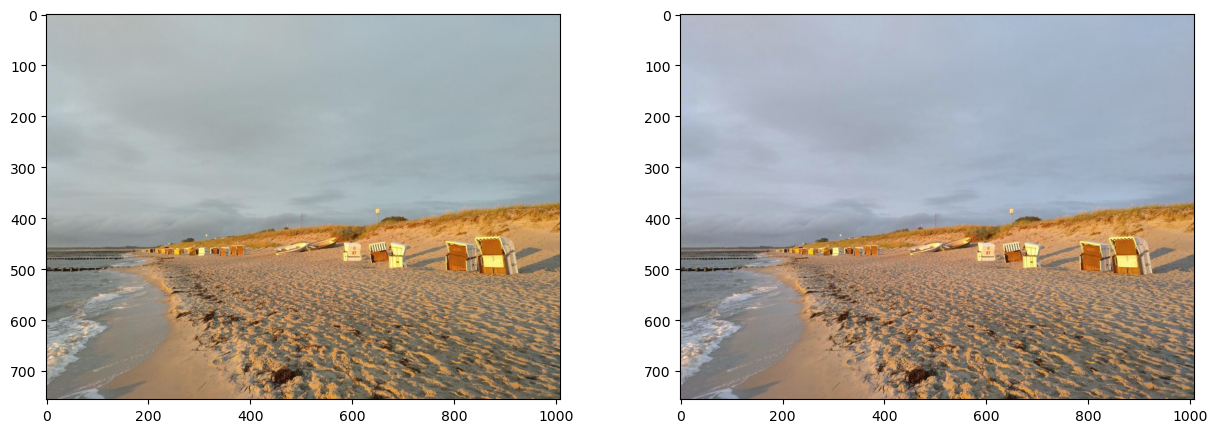

In [80]:
# Load your image
img = cv2.imread('sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[...,0])
max_g = np.max(img[...,1])
max_b = np.max(img[...,2])

# Apply scale-by-max balancing and generate the balanced image
coeffs=[max_r, max_g, max_b]
print("coeffs:", max_r, max_g, max_b)

balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] / coeffs[channel]
    
print("type balanced:", balanced.dtype)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)
